# Evaluación de los resultados del modelo

## Objetivo

El objetivo del presente notebook es evaluar los resultados del modelo. Se utilizará el dataset de testeo que se dejó inicialmente en el notebook anterior para identificar cuántas órdenes tendrán al menos una recomendación. La idea es jugar con el valor del lift y evaluar los distintos casos.

#### Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_palette("pastel")

#### Importar datos

In [20]:
## Datos de órdenes del dataset de testeo
orders = pd.read_csv('C:/Users/josefina.lin/Documents/Master/10-Trabajo Final/datasets/test.csv')

In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36177 entries, 0 to 36176
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StockCode    36177 non-null  object
 1   Description  36177 non-null  object
 2   InvoiceNo    36177 non-null  object
 3   Country      36177 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [4]:
## Resultados del FP-Growth
fpg = pd.read_csv('C:/Users/josefina.lin/Documents/Master/10-Trabajo Final/datasets/fp_growth_results.csv')

In [5]:
fpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   antecedents              2218 non-null   object 
 1   antecedents_description  2218 non-null   object 
 2   consequents              2218 non-null   object 
 3   consequents_description  2218 non-null   object 
 4   support                  2218 non-null   float64
 5   confidence               2218 non-null   float64
 6   lift                     2218 non-null   float64
dtypes: float64(3), object(4)
memory usage: 121.4+ KB


In [6]:
fpg.head()

,antecedents,antecedents_description,consequents,consequents_description,support,confidence,lift
0,20975,12 PENCILS SMALL TUBE RED RETROSPOT,20974,12 PENCILS SMALL TUBE SKULL,0.005482,0.363636,25.781377
1,20974,12 PENCILS SMALL TUBE SKULL,20975,12 PENCILS SMALL TUBE RED RETROSPOT,0.005482,0.388664,25.781377
2,22150,3 STRIPEY MICE FELTCRAFT,22149,FELTCRAFT 6 FLOWER FRIENDS,0.005825,0.298246,12.376486
3,22150,3 STRIPEY MICE FELTCRAFT,22147,FELTCRAFT BUTTERFLY HEARTS,0.006167,0.315789,13.964912
4,23354,6 GIFT TAGS 50'S CHRISTMAS,23351,ROLL WRAP 50'S CHRISTMAS,0.005196,0.439614,33.040824


Se observa que la mediana de lift es de 8,81. Es decir, al menos el 50 de los productos comprados tienen un lift menor al 8,81. 

In [7]:
fpg.describe()

,support,confidence,lift
count,2218.000000,2218.000000,2218.000000
mean,0.007804,0.331585,15.116075
std,0.003331,0.218528,17.772122
min,0.005025,0.050257,1.190347
25%,0.005653,0.150834,3.489680
50%,0.006738,0.264000,8.815212
75%,0.008623,0.479518,19.739775
max,0.029979,0.969388,109.220063


## Evaluación

### Todas las reglas de asociación

In [8]:
fpg.sort_values(by=['antecedents'])

,antecedents,antecedents_description,consequents,consequents_description,support,confidence,lift
334,15056BL,EDWARDIAN PARASOL BLACK,15056N,EDWARDIAN PARASOL NATURAL,0.005996,0.509709,30.464230
336,15056N,EDWARDIAN PARASOL NATURAL,20679,EDWARDIAN PARASOL RED,0.005539,0.331058,26.472548
335,15056N,EDWARDIAN PARASOL NATURAL,15056BL,EDWARDIAN PARASOL BLACK,0.005996,0.358362,30.464230
126,20675,BLUE POLKADOT BOWL,21238,RED RETROSPOT CUP,0.005139,0.409091,30.227848
129,20675,BLUE POLKADOT BOWL,20676,RED RETROSPOT BOWL,0.005482,0.436364,29.618605
...,...,...,...,...,...,...,...
330,DOT,DOTCOM POSTAGE,21931,JUMBO STORAGE BAG SUKI,0.008737,0.726115,33.020072
329,DOT,DOTCOM POSTAGE,22502,PICNIC BASKET WICKER SMALL,0.005539,0.357934,20.351081
328,DOT,DOTCOM POSTAGE,22379,RECYCLING BAG RETROSPOT,0.005767,0.372694,14.900942
327,DOT,DOTCOM POSTAGE,22386,JUMBO BAG PINK POLKADOT,0.008223,0.671233,25.742897


##### Contamos cuántos productos consecuentes tienen asociados a un antecedente

In [9]:
rmd_gb = fpg.groupby(by = ['antecedents'])\
            .agg({'consequents':'nunique'})\
            .rename(columns={'consequents':'qty_recommended_products'})\
            .reset_index()
rmd_gb.head(5)

,antecedents,qty_recommended_products
0,15056BL,1
1,15056N,2
2,20675,6
3,20676,1
4,20677,2


##### Mergeamos la tabla de órdenes con la tabla de recomendados (cantidad de recomendados por antecedente)

In [10]:
rmd_m = orders.merge(right=rmd_gb, 
                     left_on='StockCode',
                     right_on='antecedents',
                     how='inner'
                     )

El 68% de las órdenes tendrán al menos 1 producto a recomendar y el 46% de las órdenes tendrán al menos 3 productos a recomendar.

In [11]:
round(rmd_m['InvoiceNo'].nunique()/orders['InvoiceNo'].nunique(),2)

0.68

In [12]:
round(rmd_m[rmd_m['qty_recommended_products']>3]['InvoiceNo'].nunique()/orders['InvoiceNo'].nunique(),2)

0.46

##### Revisamos distribución por cantidad de productos recomendados

In [42]:
qrp = rmd_m.groupby(by=['qty_recommended_products'])\
          .agg({'InvoiceNo':'nunique'})\
          .rename(columns={'InvoiceNo':'qty_orders'})\
          .reset_index()    

In [43]:
qrp['share'] = round(qrp['qty_orders']/qrp['qty_orders'].sum()*100,2)

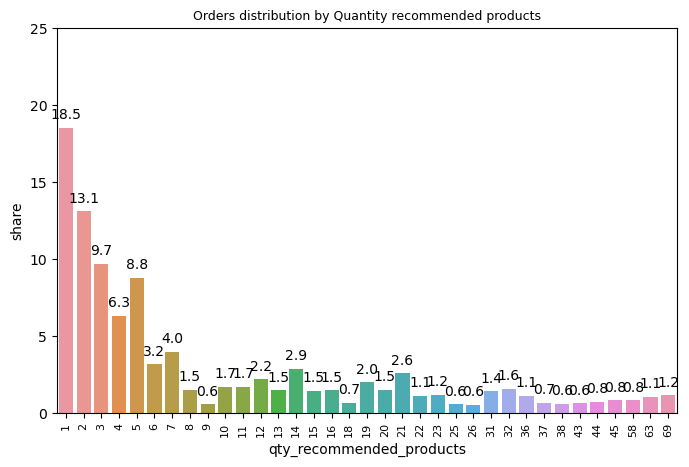

In [47]:
plt.figure(figsize=(8, 5))
splot = sns.barplot(x = qrp.qty_recommended_products, 
                    y = qrp.share)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylim(0, 25)
splot.tick_params(axis='x', rotation=90, labelsize=8)
plt.title('Orders distribution by Quantity recommended products', fontsize=9)    
plt.show()

### Filtramos el dataset para lift > 9

In [13]:
fpg.describe()

,support,confidence,lift
count,2218.000000,2218.000000,2218.000000
mean,0.007804,0.331585,15.116075
std,0.003331,0.218528,17.772122
min,0.005025,0.050257,1.190347
25%,0.005653,0.150834,3.489680
50%,0.006738,0.264000,8.815212
75%,0.008623,0.479518,19.739775
max,0.029979,0.969388,109.220063


In [14]:
fpg_lift = fpg[fpg['lift'] > 9].copy()

##### Contamos cuántos productos consecuentes tienen asociados a un antecedente

In [15]:
rmd_gb_lift = fpg_lift.groupby(by = ['antecedents'])\
                      .agg({'consequents':'nunique'})\
                      .rename(columns={'consequents':'qty_recommended_products'})\
                      .reset_index()
rmd_gb_lift.head(5)

,antecedents,qty_recommended_products
0,15056BL,1
1,15056N,2
2,20675,6
3,20676,1
4,20677,2


##### Mergeamos la tabla de órdenes con la tabla de recomendados (cantidad de recomendados por antecedente)

In [17]:
rmd_lift_m = orders.merge(right=rmd_gb_lift, 
                          left_on='StockCode',
                          right_on='antecedents',
                          how='inner'
                          )

##### Revisamos distribución por cantidad de productos recomendados

In [23]:
qrp_lift = rmd_lift_m.groupby(by=['qty_recommended_products'])\
                      .agg({'InvoiceNo':'nunique'})\
                      .rename(columns={'InvoiceNo':'qty_orders'})\
                      .reset_index()                        

In [30]:
qrp_lift['share'] = round(qrp_lift['qty_orders']/qrp_lift['qty_orders'].sum()*100,2)

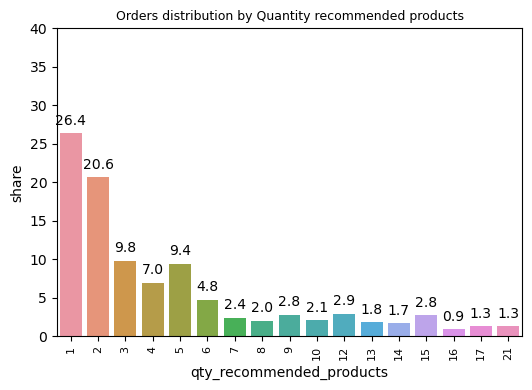

In [41]:
plt.figure(figsize=(6, 4))
splot = sns.barplot(x = qrp.qty_recommended_products, 
                    y = qrp.share)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylim(0, 40)
splot.tick_params(axis='x', rotation=90, labelsize=8)
plt.title('Orders distribution by Quantity recommended products', fontsize=9)    
plt.show()

Al exigir un umbral de lift más exigente, se puede observar que el porcentaje de órdenes que tendrá al menos 1 producto a recomendar baja de 68% a 61%, y de los que tienen al menos 3 productos a recomendar disminuye aún más (de 46% a 31%).

In [18]:
round(rmd_lift_m['InvoiceNo'].nunique()/orders['InvoiceNo'].nunique(),2)

0.61

In [19]:
round(rmd_lift_m[rmd_lift_m['qty_recommended_products']>3]['InvoiceNo'].nunique()/orders['InvoiceNo'].nunique(),2)

0.31